In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img


In [39]:
train_dir="train"
validation_dir="val"

In [34]:
class_names=os.listdir(train_dir)

In [35]:
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

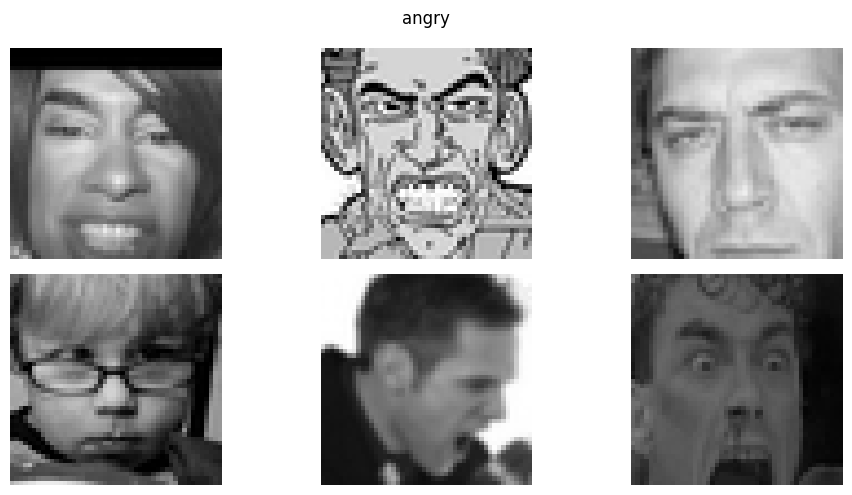

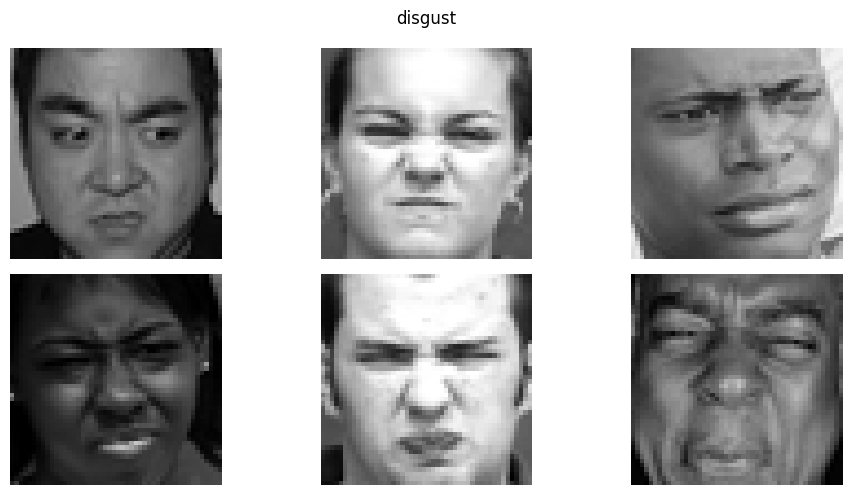

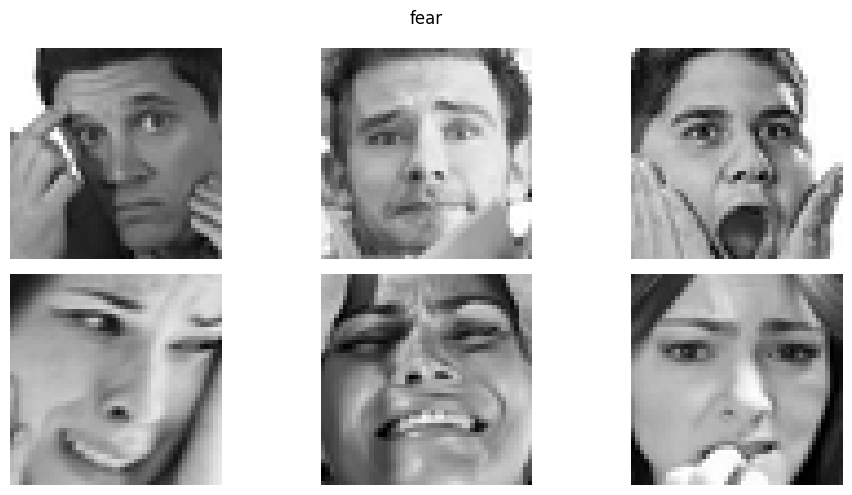

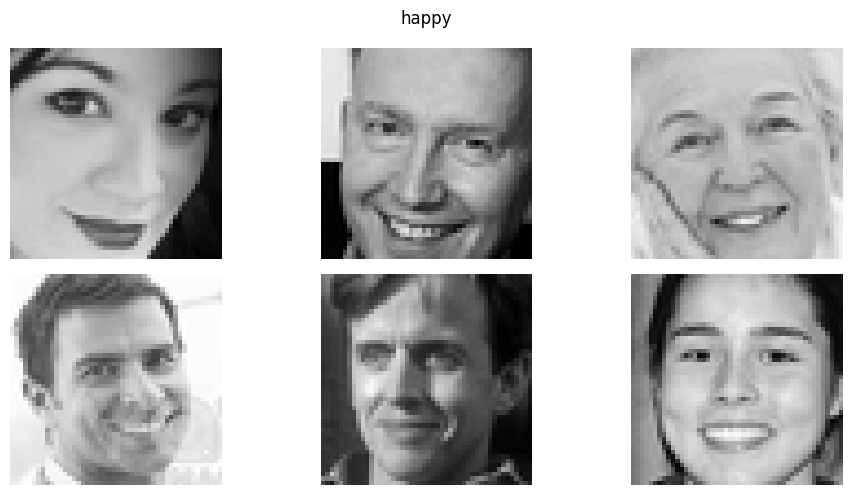

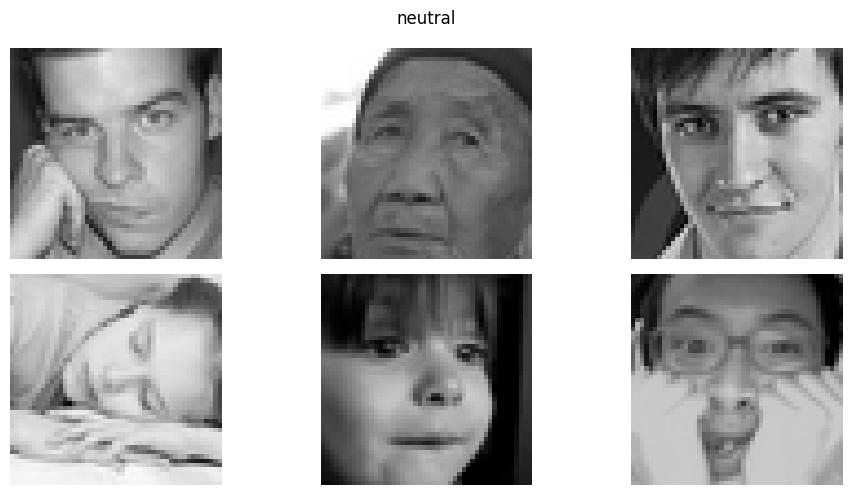

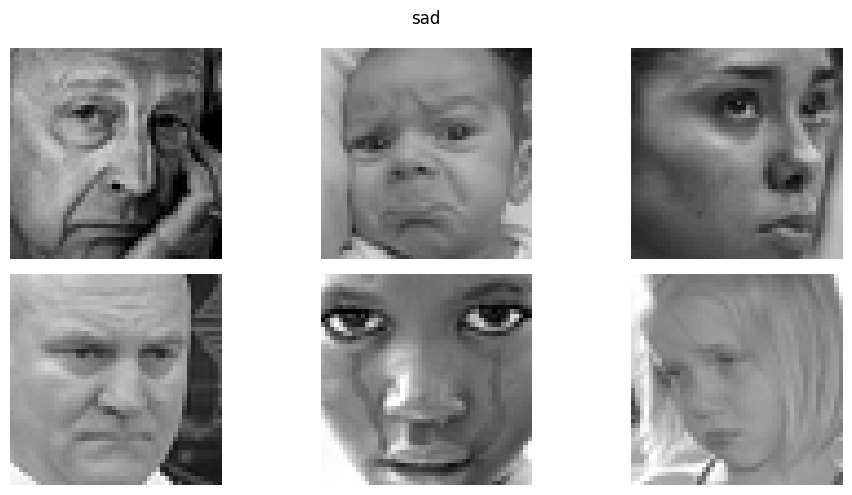

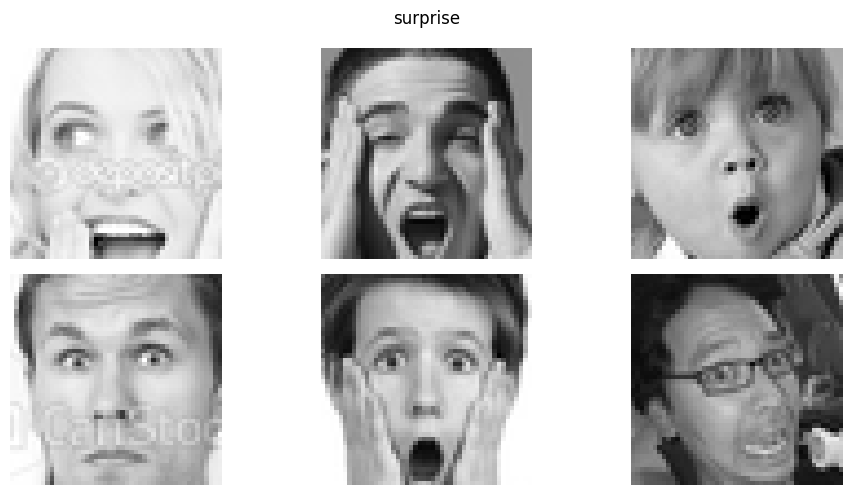

In [48]:

def plot_random_images(base_dir, class_names, num_images=4, num_columns=2):
    for class_name in class_names:
        class_dir = os.path.join(base_dir, class_name)
        image_files = [f for f in os.listdir(class_dir) if f.lower().endswith((".png", ".jpeg", ".jpg"))]
        
        if not image_files:
            print(f"No image files found in {class_dir}")
            continue
        
        image_filenames = np.random.choice(image_files, min(num_images, len(image_files)), replace=False)
        num_rows = (len(image_filenames) + num_columns - 1) // num_columns
        
        plt.figure(figsize=(10, 5))
        
        for idx, image_filename in enumerate(image_filenames):
            img_path = os.path.join(class_dir, image_filename)
            img = Image.open(img_path)
            img_array = np.array(img)
            
            if len(img_array.shape) == 2:
                img_array = np.stack((img_array,) * 3, axis=-1)
            
            plt.subplot(num_rows, num_columns, idx+1)
            plt.imshow(img_array)
            plt.axis("off")
        
        plt.suptitle(class_name)
        plt.tight_layout()
        plt.show()

# Example usage
plot_random_images(train_dir, class_names, num_images=6, num_columns=3)


In [50]:
#load model
model = tf.keras.models.load_model('model_after_fine_tuning.h5')

1/1 [==============================] - 0s 45ms/step


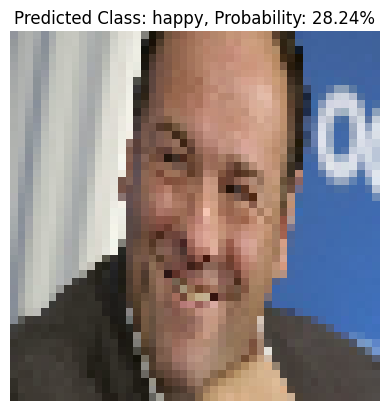

Class: angry, Probability: 12.89%
Class: disgust, Probability: 1.36%
Class: fear, Probability: 13.21%
Class: happy, Probability: 28.24%
Class: neutral, Probability: 20.00%
Class: sad, Probability: 21.07%
Class: surprise, Probability: 3.24%
Predicted class: happy


In [54]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_and_plot_image(class_names, model, image_filename, base_dir=""):
  
    # Load the image
    img_path = os.path.join(base_dir, image_filename)
    img = image.load_img(img_path, target_size=(48, 48))
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    img_array /= 255.0 
    
    # Make the prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])  
    
    predicted_class = class_names[predicted_class_index]
    predicted_probs = predictions[0]
    
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class}, Probability: {predicted_probs[predicted_class_index]:.2%}")
    plt.axis("off")
    plt.show()
    
    # Print class names and probabilities
    for class_name, prob in zip(class_names, predicted_probs):
        print(f"Class: {class_name}, Probability: {prob:.2%}")
    
    return predicted_class

image_filename = "tony.png"  
predicted_class = predict_and_plot_image(class_names, model, image_filename)
print(f"Predicted class: {predicted_class}")
